<a href="https://colab.research.google.com/github/sidhant-guliani/Deep-learning-projects/blob/master/dog_cat_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer




from keras.applications import VGG16
from keras.applications.resnet50 import ResNet50

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import zipfile
import pandas as pd
import random

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [ ]:
!ls

sample_data


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
#local_zip = 'C:/Users/sidha/Desktop/deep_learnign_notebooks'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
#zip_ref.close()

--2020-08-23 03:15:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   285MB/s    in 0.2s    

2020-08-23 03:15:35 (285 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
#zip_ref.printdir()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#directory with taining/validation cats/dog pics
train_cats_dir = os.path.join(train_dir, 'cats')
valid_cats_dir = os.path.join(validation_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
valid_dogs_dir = os.path.join(validation_dir, 'dogs')
print(train_cats_dir)
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)


/tmp/cats_and_dogs_filtered/train/cats


In [ ]:
print(train_cat_fnames[:10])
print(os.listdir(valid_dogs_dir)[:10])


['cat.746.jpg', 'cat.42.jpg', 'cat.780.jpg', 'cat.383.jpg', 'cat.150.jpg', 'cat.423.jpg', 'cat.419.jpg', 'cat.394.jpg', 'cat.897.jpg', 'cat.281.jpg']
['dog.2311.jpg', 'dog.2027.jpg', 'dog.2242.jpg', 'dog.2408.jpg', 'dog.2187.jpg', 'dog.2147.jpg', 'dog.2203.jpg', 'dog.2400.jpg', 'dog.2369.jpg', 'dog.2258.jpg']


## Small Model 

In [ ]:
# building a small convnet
image_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation= 'relu')(image_input)
x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = layers.Conv2D(32,3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Next step is fully connected layer
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = Model(image_input, output)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)       

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

## Image preprocessing

Using ImageDataGenerator for rescaling and resizing

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch=100,  # 2000 images = batch_size * steps
          epochs=15,
          validation_data=validation_generator,
          validation_steps=50,  # 1000 images = batch_size * steps
          verbose=2)

Epoch 1/15
100/100 - 56s - loss: 0.7835 - acc: 0.5740 - val_loss: 0.6421 - val_acc: 0.6620
Epoch 2/15
100/100 - 56s - loss: 0.6323 - acc: 0.6695 - val_loss: 0.5786 - val_acc: 0.6990
Epoch 3/15
100/100 - 56s - loss: 0.5199 - acc: 0.7485 - val_loss: 0.7556 - val_acc: 0.6150
Epoch 4/15
100/100 - 56s - loss: 0.4541 - acc: 0.7775 - val_loss: 0.5834 - val_acc: 0.7290
Epoch 5/15
100/100 - 56s - loss: 0.3686 - acc: 0.8365 - val_loss: 0.6343 - val_acc: 0.7230
Epoch 6/15
100/100 - 56s - loss: 0.2697 - acc: 0.8795 - val_loss: 0.7429 - val_acc: 0.7160
Epoch 7/15
100/100 - 57s - loss: 0.1881 - acc: 0.9290 - val_loss: 0.7231 - val_acc: 0.7030
Epoch 8/15
100/100 - 60s - loss: 0.1235 - acc: 0.9535 - val_loss: 0.9800 - val_acc: 0.7190
Epoch 9/15
100/100 - 56s - loss: 0.0945 - acc: 0.9675 - val_loss: 1.2360 - val_acc: 0.7000
Epoch 10/15
100/100 - 56s - loss: 0.0722 - acc: 0.9760 - val_loss: 1.2309 - val_acc: 0.7060
Epoch 11/15
100/100 - 56s - loss: 0.0565 - acc: 0.9830 - val_loss: 1.4651 - val_acc: 0.70

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Text(0.5, 1.0, 'Training and validation loss')

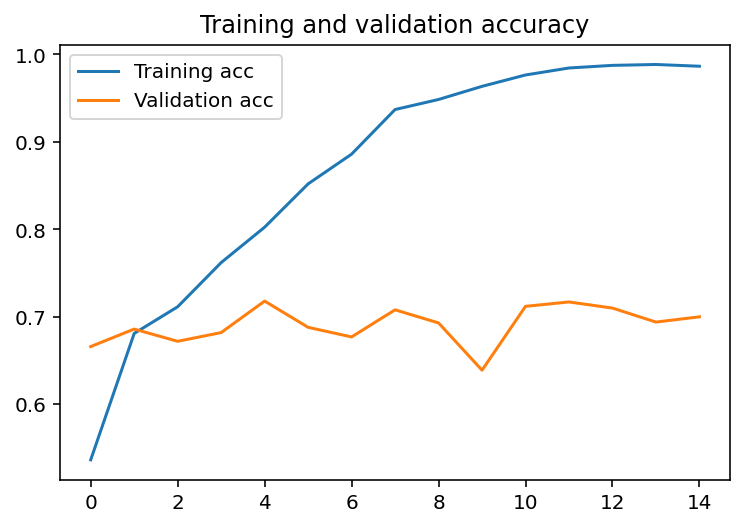

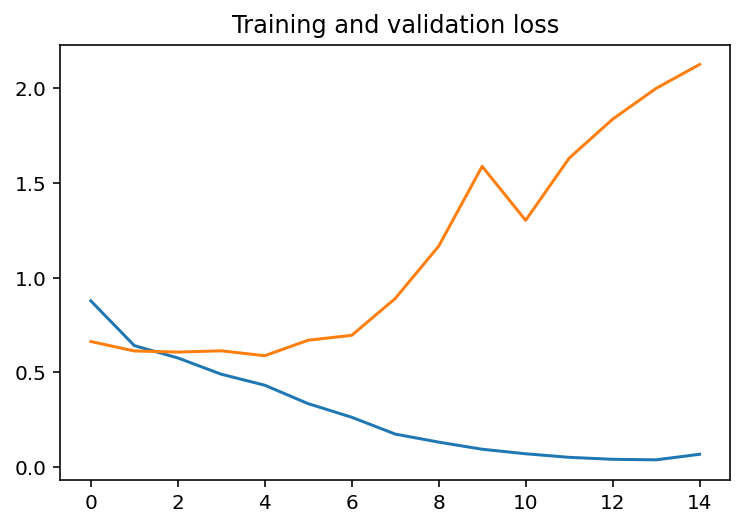

In [ ]:
print(history.history.keys())
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

We are  clearly ***overfititng***. The training accuracy gets close to 100% wile the validation accuracy is still 70%. Even validation loss reacheas minimum after 5 epochs.  We are focusing on data augmentation

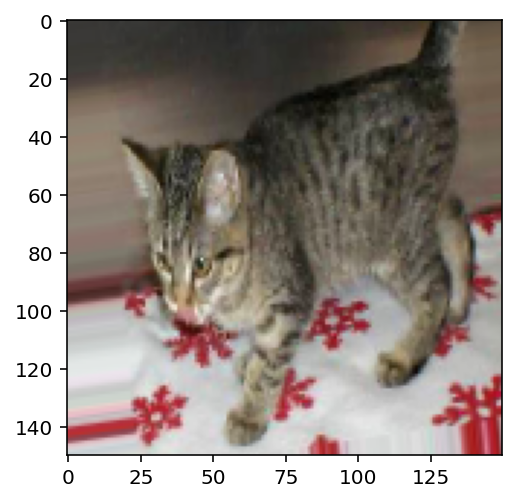

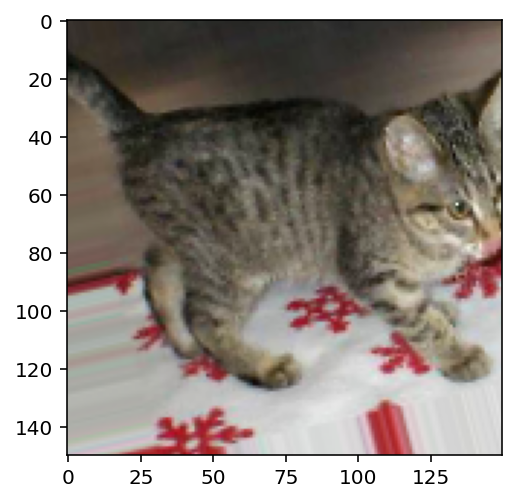

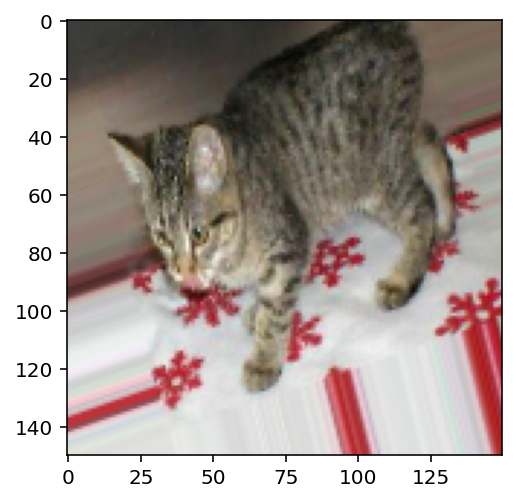

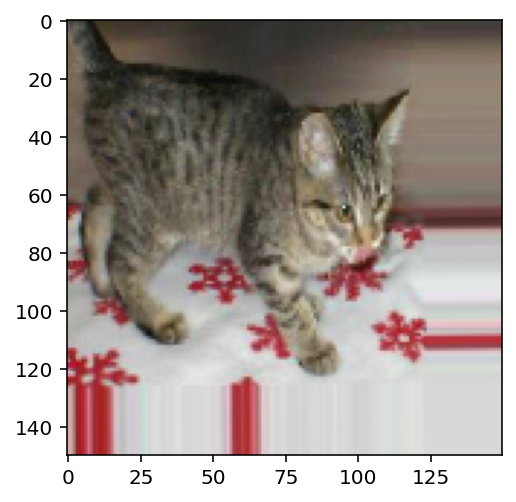

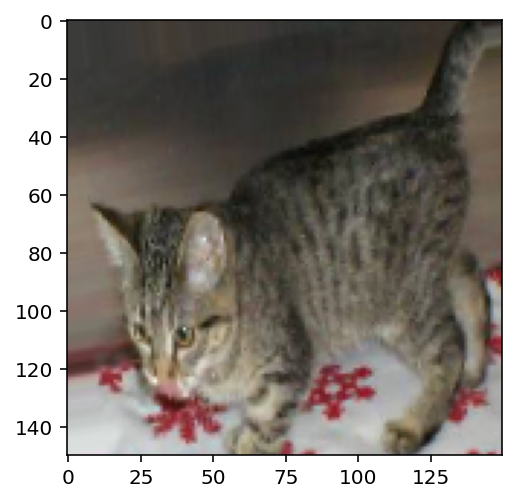

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

img_path = os.path.join(train_cats_dir, train_cat_fnames[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
## preparing the 

img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0   

In [ ]:
history_2 = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
100/100 - 57s - loss: 0.7506 - acc: 0.5410 - val_loss: 0.6703 - val_acc: 0.5990
Epoch 2/30
100/100 - 56s - loss: 0.6780 - acc: 0.5925 - val_loss: 0.6215 - val_acc: 0.6540
Epoch 3/30
100/100 - 55s - loss: 0.6442 - acc: 0.6280 - val_loss: 0.6628 - val_acc: 0.6150
Epoch 4/30
100/100 - 55s - loss: 0.6469 - acc: 0.6340 - val_loss: 0.6381 - val_acc: 0.6400
Epoch 5/30
100/100 - 55s - loss: 0.6266 - acc: 0.6570 - val_loss: 0.5911 - val_acc: 0.6990
Epoch 6/30
100/100 - 55s - loss: 0.6126 - acc: 0.6675 - val_loss: 0.5802 - val_acc: 0.6940
Epoch 7/30
100/100 - 59s - loss: 0.6076 - acc: 0.6715 - val_loss: 0.5858 - val_acc: 0.6950
Epoch 8/30
100/100 - 55s - loss: 0.5954 - acc: 0.6960 - val_loss: 0.5897 - val_acc: 0.6720
Epoch 9/30
100/100 - 56s - loss: 0.5906 - acc: 0.6850 - val_loss: 0.5587 - val_acc: 0.6940
Epoch 10/30
100/100 - 56s - loss: 0.5910 - acc: 0.6960 - val_loss: 0.5347 - val_acc: 0.7370
Epoch 11/30
100/100 - 55s - loss: 0.5774 - acc: 0.7040 - val_loss: 0.5301 - val_acc: 0.73

Text(0.5, 1.0, 'Training and validation loss')

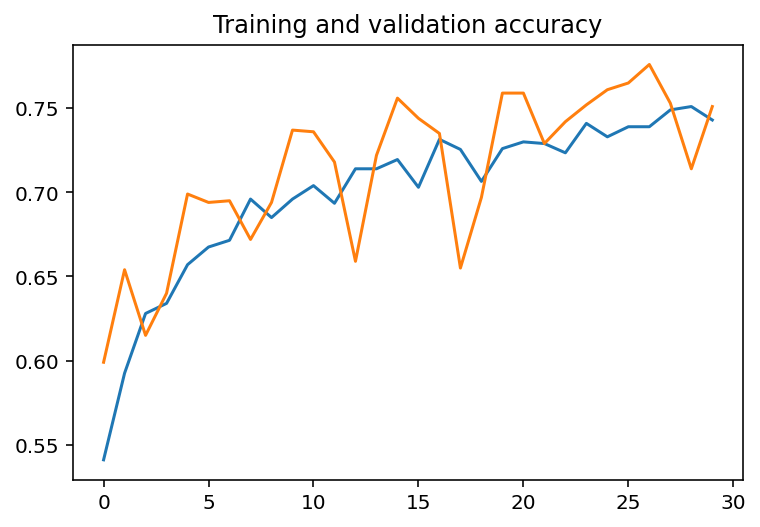

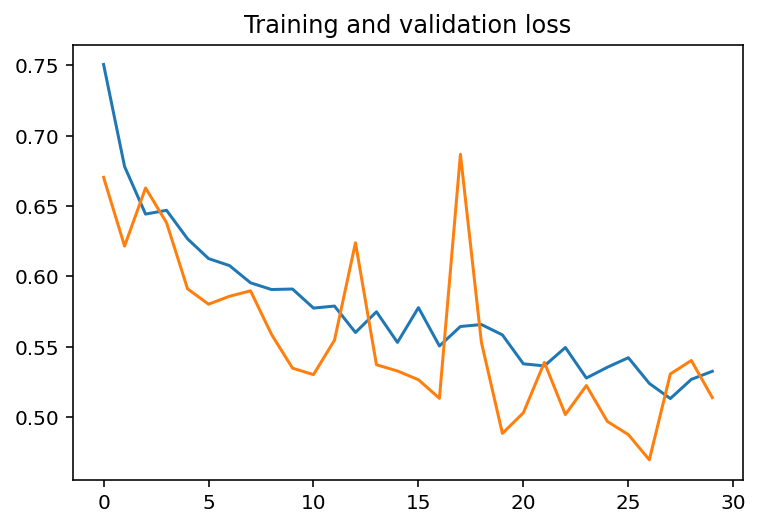

In [ ]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

sample_data


## Feature Extraction & Fine-Tuning

#### Feature extraction from pre-trained model

In [ ]:
input_shape = (150, 150, 3)

vgg = VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_______________________________________________________

In [ ]:
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f6c29f3b9b0>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6c269bc438>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6c269bc7b8>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f6c269bcb70>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6c2898d780>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6c289a62b0>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f6c289a6a20>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6c289ab240>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6c289abe48>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6c289b44e0>,block3_conv3,False


In [ ]:
vgg_model.output_shape[1]

8192

In [ ]:
input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 8192)              14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 4,457,985
Non-trainable params: 14,714,688
__________________________________

In [ ]:
history_vgg = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 672s 7s/step - loss: 0.6894 - accuracy: 0.5600 - val_loss: 0.5751 - val_accuracy: 0.7930
Epoch 2/30
100/100 [==============================] - 667s 7s/step - loss: 0.6303 - accuracy: 0.6370 - val_loss: 0.5024 - val_accuracy: 0.8220
Epoch 3/30
100/100 [==============================] - 667s 7s/step - loss: 0.5789 - accuracy: 0.6975 - val_loss: 0.4512 - val_accuracy: 0.8310
Epoch 4/30
100/100 [==============================] - 664s 7s/step - loss: 0.5252 - accuracy: 0.7420 - val_loss: 0.4108 - val_accuracy: 0.8370
Epoch 5/30
100/100 [==============================] - 665s 7s/step - loss: 0.5222 - accuracy: 0.7405 - val_loss: 0.3823 - val_accuracy: 0.8430
Epoch 6/30
100/100 [==============================] - 669s 7s/step - loss: 0.4800 - accuracy: 0.7710 - val_loss: 0.3606 - val_accuracy: 0.8490
Epoch 7/30
100/100 [==============================] - 676s 7s/step

In [ ]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Fine-Tuning & Image Augmentation Performance (VGG)', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))

ax2.plot(epoch_list, history_vgg.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_vgg.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

ax1.plot(epoch_list, history_vgg.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_vgg.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")


In [ ]:
model.save_weights('./checkpoints/my_checkpoint')
model.save('my_model.h5') 

In [ ]:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# https://github.com/dipanjanS/hands-on-transfer-learning-with-python/blob/master/notebooks/Ch05%20-%20Unleash%20the%20Power%20of%20Transfer%20Learning/CNN%20with%20Transfer%20Learning.ipynb
# https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#add_weight_regularization